Read Data sets

    ADR
0   0.0
1   0.0
2  75.0
3  75.0
4  98.0
1
2
3
4


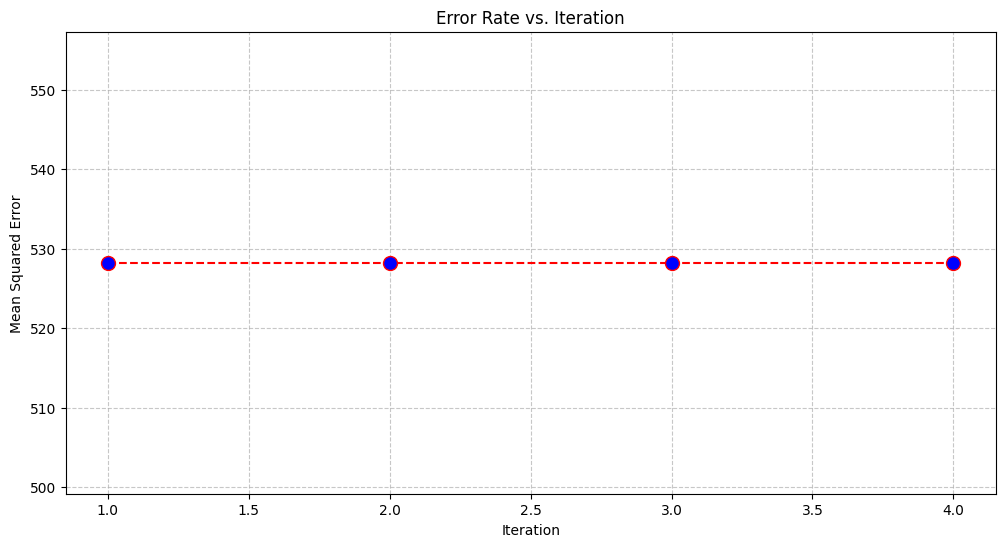

In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

data_set = pd.read_csv("../data/H1.csv")

iggnore_cols = ["ArrivalDateMonth", "ADR", "MarketSegment", "Company", "Country", "Meal", 
               "DistributionChannel", "AssignedRoomType", "ReservedRoomType", "DepositType", 
               "CustomerType", "ReservationStatus", "ReservationStatusDate"]

X_columns = data_set[[col for col in data_set.columns if col not in iggnore_cols]]
Y_columns = data_set[['ADR']]  # Make sure this is a dataframe with just the ADR column

# Replace string 'NULL' values with 0
X_columns = X_columns.replace(' NULL', 0)
X_columns = X_columns.replace('NULL', 0)

# Convert all columns to numeric
for col in X_columns.columns:
    X_columns[col] = pd.to_numeric(X_columns[col], errors='coerce')
X_columns = X_columns.fillna(0)  # Replace any NaNs with 0

print(Y_columns.head())

X_train, X_test, y_train, y_test = train_test_split(X_columns, Y_columns, test_size=0.25, random_state=0)

error = []
for i in range(1, 5):
    print(i)
    model = RandomForestRegressor(n_estimators=550, random_state=20)
    model.fit(X_train, y_train.values.ravel())  # Use ravel() to convert to 1D array
    pred_i = model.predict(X_test)
    
    # Properly calculate error metrics
    mse = mean_squared_error(y_test, pred_i)
    error.append(mse)
    
    # Optional: print progress
    if i % 5 == 0:
        print(f"Iteration {i}, MSE: {mse:.4f}")

plt.figure(figsize=(12, 6))
plt.plot(range(1, 5), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate vs. Iteration')
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.grid(True, linestyle='--', alpha=0.7)

In [2]:
model = RandomForestRegressor(n_estimators=550, random_state=20)
model.fit(X_train, y_train)


c:\Users\Quotus\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(n_estimators=550, random_state=20)

In [5]:
from sklearn.preprocessing import StandardScaler
# First fit the scaler with training data
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)

# Retrain the model with scaled data
model = RandomForestRegressor(n_estimators=550, random_state=20)
model.fit(X_train_scaled, y_train)

# Now transform new data
newEmp = [[0,345,2019,27,1,0,0,2,0,0,10,0,0,3,0,0,0,0]]
# Make sure newEmp has same features as training data
if len(newEmp[0]) != X_train.shape[1]:
    raise ValueError(f"Expected {X_train.shape[1]} features, got {len(newEmp[0])}")

# Transform new data using fitted scaler
newEmp_scaled = sc.transform(newEmp)

# Make prediction
result = model.predict(newEmp_scaled)
print(f"Predicted room price: ${result[0]:.2f}")

c:\Users\Quotus\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Predicted room price: $98.95


c:\Users\Quotus\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
